In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day37-handling-missing-categorical-data/train.csv')[['GarageQual','FireplaceQu','SalePrice']]
df.sample(5)

,GarageQual,FireplaceQu,SalePrice
545,TA,NaN,229000
629,TA,NaN,168500
493,TA,Fa,155000
966,TA,TA,160000
988,TA,TA,195000


In [3]:
df.isnull().mean()*100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

In [4]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [5]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

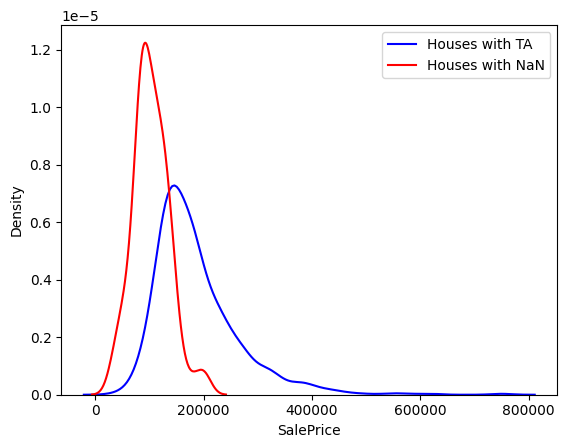

In [6]:
sns.kdeplot(df[df['GarageQual'] == 'TA']['SalePrice'] ,c='b', label = 'Houses with TA')
sns.kdeplot(df[df['GarageQual'].isnull()]['SalePrice'] ,c='r', label = 'Houses with NaN')
plt.legend()
plt.show()


In [7]:
temp = df[df['GarageQual'] == 'TA']['SalePrice'] # storing the old one

In [8]:
df['GarageQual'].fillna('TA' , inplace = True) # 'TA' u can also use 'missing' but it's not standard

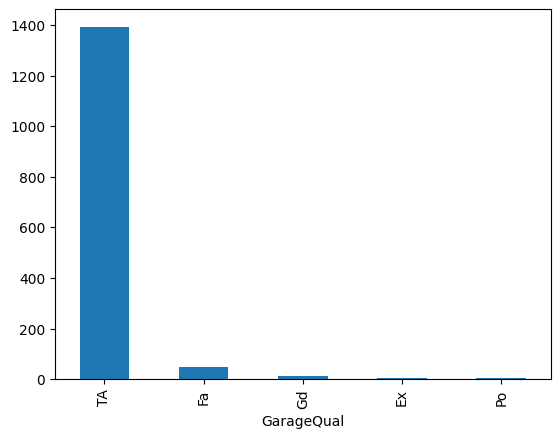

In [9]:
df['GarageQual'].value_counts().plot(kind = 'bar')
plt.show()

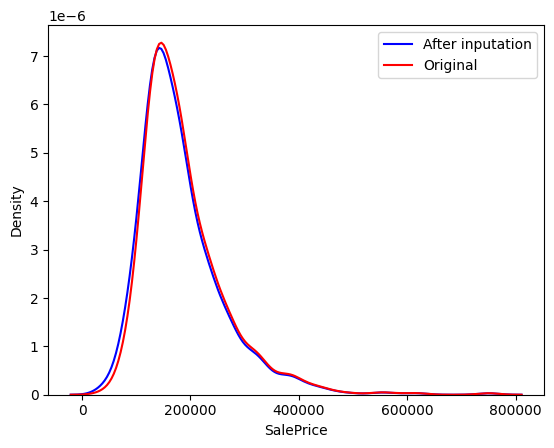

In [10]:
# After Filling the missing value in GarageQual

sns.kdeplot(df[df['GarageQual'] == 'TA']['SalePrice'] ,c='b', label = 'After inputation')
sns.kdeplot(temp ,c='r', label = 'Original')
plt.legend()
plt.show()

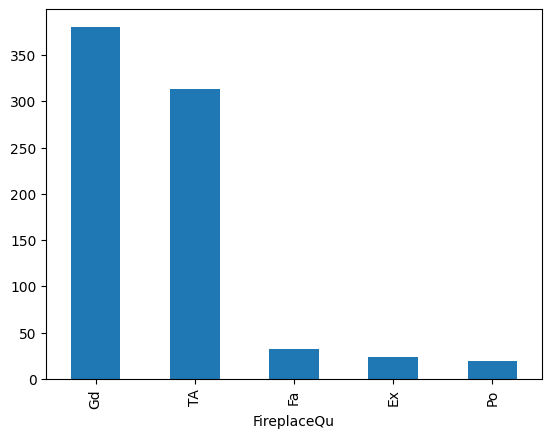

In [11]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')
plt.show()

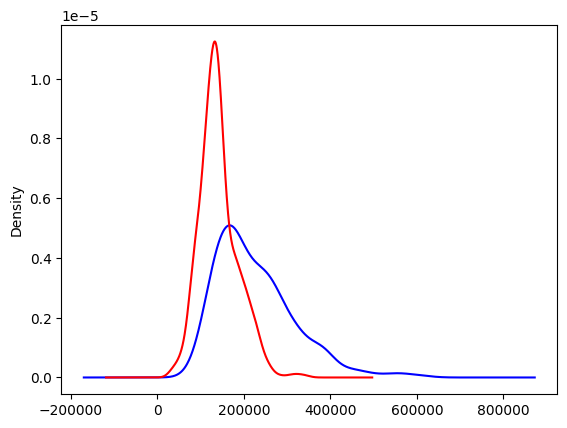

In [12]:
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde' , c='b')
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind = 'kde', c='r')
plt.show()

In [13]:
temp1 = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [14]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [15]:
df['FireplaceQu'].fillna('Gd' , inplace = True)

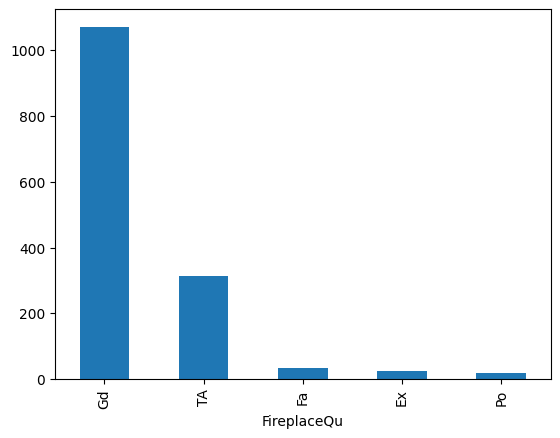

In [16]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')
plt.show()

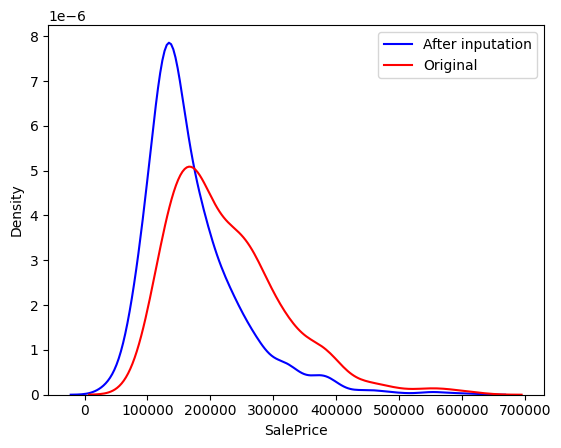

In [17]:
# Note after imputation ditribution not overlapping so u should not use most frequent value to fill the missing val
sns.kdeplot(df[df['FireplaceQu'] == 'Gd']['SalePrice'] ,c='b', label = 'After inputation')
sns.kdeplot(temp1 ,c='r', label = 'Original')
plt.legend()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'] , random_state = 2 , test_size = 0.1)

In [21]:
trf = SimpleImputer(strategy='most_frequent')
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)


In [23]:
trf.statistics_

array(['TA', 'Gd'], dtype=object)